In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
def load_data_corr():
    data = pd.read_csv('heart.csv')
    #Find correlation between features
    corr = data.corr()
    sns.heatmap(corr,annot=True, linewidths=1.5,fmt=".1f")
    corr_target = abs(corr["output"])
    relevant_feature = corr_target[corr_target > 0.3]
    print(relevant_feature)
    y = data["output"]
    X = data[["cp","thalachh","exng","oldpeak","slp","caa","thall"]]
    print(X.shape)
    return X,y

cp          0.433798
thalachh    0.421741
exng        0.436757
oldpeak     0.430696
slp         0.345877
caa         0.391724
thall       0.344029
output      1.000000
Name: output, dtype: float64
(303, 7)
[[ 1.97312292  0.01544279 -0.69663055 ... -2.27457861 -0.71442887
  -2.14887271]
 [ 1.00257707  1.63347147 -0.69663055 ... -2.27457861 -0.71442887
  -0.51292188]
 [ 0.03203122  0.97751389 -0.69663055 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [-0.93851463 -0.37813176 -0.69663055 ... -0.64911323  1.24459328
   1.12302895]
 [-0.93851463 -1.51512489  1.43548113 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.03203122  1.0649749  -0.69663055 ... -0.64911323  0.26508221
  -0.51292188]]


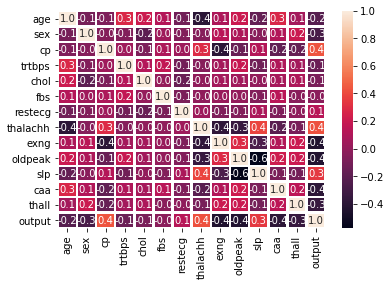

In [3]:
feature, target = load_data_corr()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scalling
feature = StandardScaler().fit_transform(feature)
# feature = MinMaxScaler().fit_transform(feature)
print(feature)

In [4]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.8, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
print(target_train.shape)

(60,)


In [7]:
logisticRegressor = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', max_iter=100000)
logisticRegressor.fit(feature_train, target_train)

LogisticRegression(class_weight='balanced', max_iter=100000, random_state=42,
                   solver='liblinear')

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(logisticRegressor, feature, target,cv=5)
print(f"Cross Validation Accuracy: {score.mean()*100}")

Cross Validation Accuracy: 82.81967213114754
